<a href="https://colab.research.google.com/github/Gaukm01/BCS-SER-project/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/BCS/audio_speech_actors_01-24"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import librosa
import IPython.display as ipd
import librosa.display
import sklearn


In [80]:
temp="/content/drive/MyDrive/BCS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav"
x,sr=librosa.load(temp)
ipd.Audio(x,rate=sr)

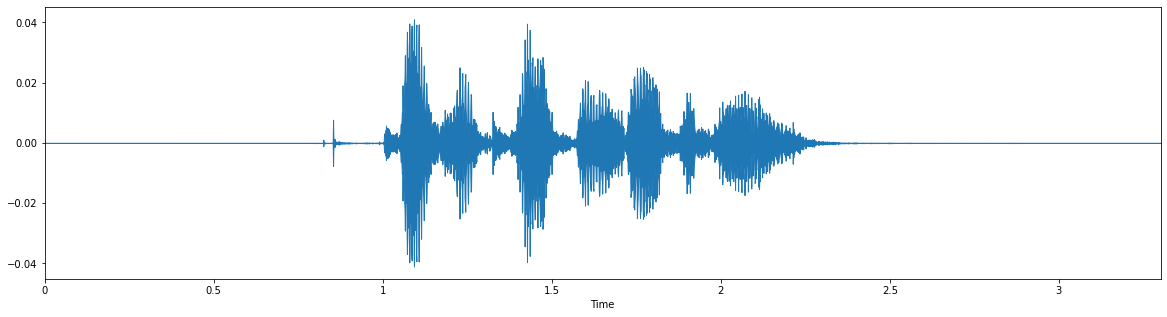

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(x,sr=sr)

(20, 143)


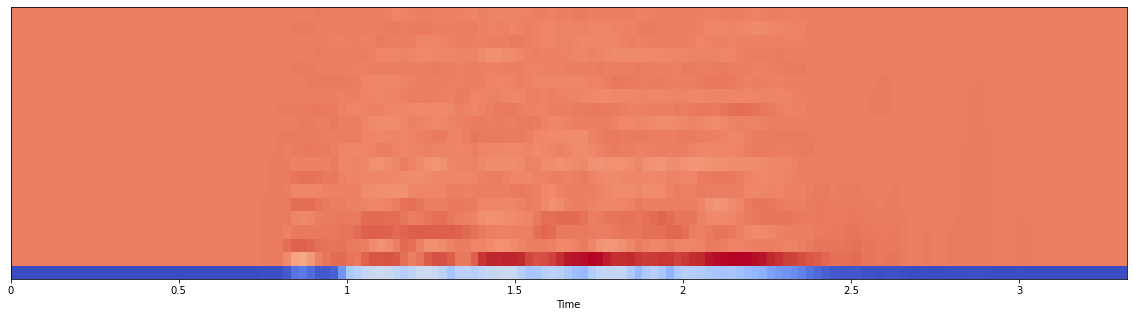

In [ ]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x,sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs,sr=sr,x_axis="time")


In [81]:
mfccs=sklearn.preprocessing.scale(mfccs,axis=1)
print(mfccs)

[[-1.1363599  -1.138227   -1.138227   ... -0.90973383 -0.9128044
  -0.93280786]
 [-0.8883182  -0.89685893 -0.89685893 ... -0.24594145 -0.25909558
  -0.34366626]
 [ 0.27947092  0.26223874  0.26223874 ...  0.48757908  0.45002586
   0.36288118]
 ...
 [ 0.808129    0.7231135   0.7231135  ... -0.10462066  0.22223426
   0.187838  ]
 [ 0.23467024  0.12894276  0.12894276 ... -0.34281015  0.96734834
   0.6141256 ]
 [ 0.47708625  0.4114297   0.4114297  ...  0.7064872   0.7186329
   0.6974005 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [4]:
emotion=[]
gender=[]
actor=[]
file_path=[]
import os
for filename in os.listdir(path):
  path2=os.path.join(path,filename)

  for file in os.listdir(path2):
   part=file.split('.')[0].split('-')
   emotion.append(int(part[2]))
   actor.append(int(part[6]))
   if int(part[6])%2==0:
     gender.append("male")
   else :
     gender.append("female")
   file_path.append(path2+'/'+file)

new_df = pd.DataFrame(emotion)
new_df = new_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
new_df = pd.concat([pd.DataFrame(gender), new_df,pd.DataFrame(actor)], axis=1)
new_df.columns = ['gender','emotion','actor']
new_df = pd.concat([new_df, pd.DataFrame(file_path, columns = ['path'])],axis=1)
print(new_df)
   

      gender  ...                                               path
0       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
2       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
3       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
4       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
...      ...  ...                                                ...
1435  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1436  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1437  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1438  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1439  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...

[1440 rows x 4 columns]


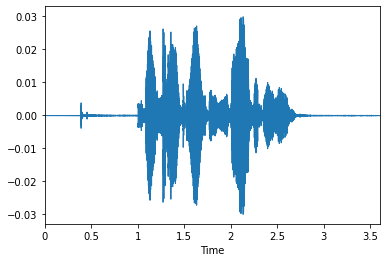

In [ ]:
x, sr=librosa.load(new_df.path[0])
librosa.display.waveplot(x,sr=sr)

In [5]:
df = pd.DataFrame(columns=['MFCC'])
count=0
for path in new_df.path:
    # Load audio and set the duration to 2.75sec so that we get MFCC array of same shape
    X, sample_rate = librosa.load(path, duration=2.75)
    # MFCC
    # n_fcc is for number of properties in MFCC array
    mfccs = librosa.feature.mfcc(X, sr = sample_rate, hop_length=512, n_mfcc=20)
    # Get the mean of columns
    mean = np.mean(mfccs.T, axis = 0)
    df.loc[count] = [mean]

    count = count+1
df.head()

,MFCC
0,"[-645.75714, 57.79723, -27.110634, 15.822222, ..."
1,"[-704.7665, 54.016422, -24.447716, 9.267881, -..."
2,"[-663.76685, 65.56084, -3.8372495, 5.6348634, ..."
3,"[-708.587, 44.129375, -4.3217573, 11.149389, -..."
4,"[-670.22375, 53.66938, -17.864428, 9.573667, -..."


(12,)

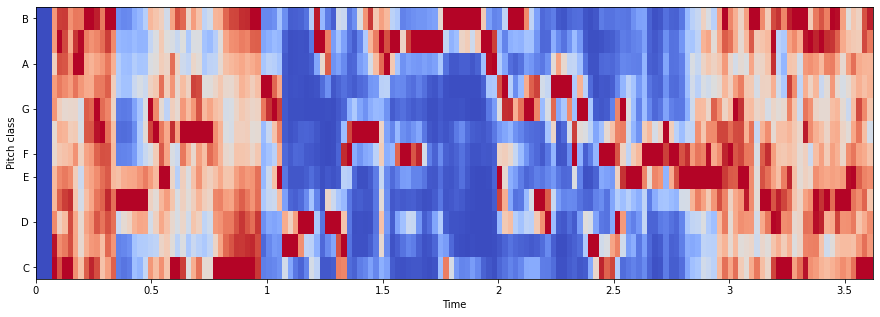

In [43]:
x,sr=librosa.load(new_df.path[0])
chroma1 = librosa.feature.chroma_stft(x,sr=sr,hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma1, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
chroma1.shape
mean = np.mean(chroma1.T, axis = 0)
mean.shape

In [44]:
df1 = pd.DataFrame(columns=['chroma'])
count=0
for path in new_df.path:
    # Load audio and set the duration to 2.75sec so that we get MFCC array of same shape
    X, sample_rate = librosa.load(path, duration=2.75)
    # MFCC
    # n_fcc is for number of properties in MFCC array
    chm = librosa.feature.chroma_stft(X, sr = sample_rate, hop_length=512)
    # Get the mean of columns
    mean = np.mean(chm.T, axis = 0)
    df1.loc[count] = [mean]

    count = count+1
df1.head()

,chroma
0,"[0.36808795, 0.34192786, 0.42986295, 0.3900944..."
1,"[0.39737964, 0.37965554, 0.48612177, 0.5467139..."
2,"[0.318858, 0.2722812, 0.34638667, 0.27987435, ..."
3,"[0.34147856, 0.2833996, 0.35058904, 0.32457143..."
4,"[0.42680195, 0.33575413, 0.33750287, 0.3736490..."


In [49]:
print(df1)

                                                 chroma
0     [0.36808795, 0.34192786, 0.42986295, 0.3900944...
1     [0.39737964, 0.37965554, 0.48612177, 0.5467139...
2     [0.318858, 0.2722812, 0.34638667, 0.27987435, ...
3     [0.34147856, 0.2833996, 0.35058904, 0.32457143...
4     [0.42680195, 0.33575413, 0.33750287, 0.3736490...
...                                                 ...
1435  [0.297748, 0.38840196, 0.32707983, 0.4304497, ...
1436  [0.40158305, 0.49713972, 0.49447197, 0.4908431...
1437  [0.39354914, 0.4170379, 0.44046235, 0.520313, ...
1438  [0.47566152, 0.4257038, 0.37771216, 0.47669983...
1439  [0.3458884, 0.3622052, 0.3993347, 0.50885373, ...

[1440 rows x 1 columns]


In [15]:
combined_df = pd.concat([new_df,df],axis=1)
print(combined_df)
train_X,test_X,train_y,test_y = train_test_split(combined_df["MFCC"],combined_df["emotion"],test_size=0.3,random_state=0)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)
train_X=pd.DataFrame(train_X.values.tolist())
test_X=pd.DataFrame(test_X.values.tolist())
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

      gender  ...                                               MFCC
0       male  ...  [-645.75714, 57.79723, -27.110634, 15.822222, ...
1       male  ...  [-704.7665, 54.016422, -24.447716, 9.267881, -...
2       male  ...  [-663.76685, 65.56084, -3.8372495, 5.6348634, ...
3       male  ...  [-708.587, 44.129375, -4.3217573, 11.149389, -...
4       male  ...  [-670.22375, 53.66938, -17.864428, 9.573667, -...
...      ...  ...                                                ...
1435  female  ...  [-549.07007, 79.03827, -3.688723, 26.907486, 7...
1436  female  ...  [-450.54437, 57.967823, -18.284353, 13.442745,...
1437  female  ...  [-618.5289, 62.47535, 6.869471, 23.727352, 7.3...
1438  female  ...  [-463.6936, 54.33327, -4.9825897, 13.446027, 2...
1439  female  ...  [-486.76956, 56.95285, -8.251723, 11.253826, 5...

[1440 rows x 5 columns]
(1008,) (432,) (1008,) (432,)
(1008, 20) (432, 20) (1008,) (432,)


In [60]:
features = pd.concat([combined_df['MFCC'],combined_df1['chroma']],axis=1)
features.shape


(1440, 2)

In [73]:
combined_df1 = pd.concat([new_df,df1],axis=1)
print(combined_df1)
train_X,test_X,train_y,test_y = train_test_split(features['MFCC'],combined_df1["emotion"],test_size=0.3,random_state=0)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)
train_X=pd.DataFrame(train_X.values.tolist())
test_X=pd.DataFrame(test_X.values.tolist())
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

      gender  ...                                             chroma
0       male  ...  [0.36808795, 0.34192786, 0.42986295, 0.3900944...
1       male  ...  [0.39737964, 0.37965554, 0.48612177, 0.5467139...
2       male  ...  [0.318858, 0.2722812, 0.34638667, 0.27987435, ...
3       male  ...  [0.34147856, 0.2833996, 0.35058904, 0.32457143...
4       male  ...  [0.42680195, 0.33575413, 0.33750287, 0.3736490...
...      ...  ...                                                ...
1435  female  ...  [0.297748, 0.38840196, 0.32707983, 0.4304497, ...
1436  female  ...  [0.40158305, 0.49713972, 0.49447197, 0.4908431...
1437  female  ...  [0.39354914, 0.4170379, 0.44046235, 0.520313, ...
1438  female  ...  [0.47566152, 0.4257038, 0.37771216, 0.47669983...
1439  female  ...  [0.3458884, 0.3622052, 0.3993347, 0.50885373, ...

[1440 rows x 5 columns]
(1008,) (432,) (1008,) (432,)
(1008, 20) (432, 20) (1008,) (432,)


In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

mean = np.mean(train_X, axis=0)
#print(mean.shape)
std = np.std(train_X, axis=0)
train_X = (train_X - mean)/std
test_X = (test_X - mean)/std

#np array
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

#one_hot encode
encoder = OneHotEncoder()
train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)
train_y= encoder.fit_transform(train_y).toarray()
test_y = encoder.fit_transform(test_y).toarray()
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

#scaler fit
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(1008, 20) (432, 20) (1008,) (432,)
(1008, 20) (432, 20) (1008, 8) (432, 8)
(1008, 20) (432, 20) (1008, 8) (432, 8)


In [10]:
import tensorflow as tf

In [75]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [76]:
def build_lstm_model(shp=(20,1), num_class=8):
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.LSTM(512, activation='linear',return_sequences=True, input_shape=(train_X.shape[1],1), dropout=0.1, recurrent_dropout=0.2))
 model.add(tf.keras.layers.LSTM(512,activation='tanh', return_sequences=True,dropout=0.1,recurrent_dropout=0.2))
 model.add(tf.keras.layers.LSTM(128,activation='linear',return_sequences=True,dropout=0.1,recurrent_dropout=0.2))
 model.add(tf.keras.layers.Flatten())
 model.add(tf.keras.layers.Dense(64))
 model.add(tf.keras.layers.Dense(train_y.shape[1],activation='Softmax'))
 return model

In [77]:
print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)
model=build_lstm_model()
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
csv_logger = tf.keras.callbacks.CSVLogger('model_history.log', separator=',', append=False)
history=model.fit(train_X,train_y,epochs=1000,batch_size=256,validation_data=(test_X,test_y),callbacks=[csv_logger])
model.summary()

(1008, 20, 1) (1008, 8) (432, 20, 1) (432, 8)
Epoch 1/1000
4/4 [==============================] - 32s 508ms/step - loss: 2.1276 - accuracy: 0.1200 - val_loss: 2.0767 - val_accuracy: 0.1481
Epoch 2/1000
4/4 [==============================] - 1s 276ms/step - loss: 2.0162 - accuracy: 0.1905 - val_loss: 1.9728 - val_accuracy: 0.2199
Epoch 3/1000
4/4 [==============================] - 1s 264ms/step - loss: 1.9599 - accuracy: 0.2411 - val_loss: 1.9329 - val_accuracy: 0.2269
Epoch 4/1000
4/4 [==============================] - 1s 263ms/step - loss: 1.9368 - accuracy: 0.2302 - val_loss: 1.8857 - val_accuracy: 0.2269
Epoch 5/1000
4/4 [==============================] - 1s 270ms/step - loss: 1.8663 - accuracy: 0.2808 - val_loss: 1.8291 - val_accuracy: 0.2708
Epoch 6/1000
4/4 [==============================] - 1s 270ms/step - loss: 1.8458 - accuracy: 0.2937 - val_loss: 1.8179 - val_accuracy: 0.2847
Epoch 7/1000
4/4 [==============================] - 1s 265ms/step - loss: 1.8098 - accuracy: 0.3234 -

In [78]:
!pip install plot_keras_history
from plot_keras_history import plot_history
import matplotlib.pyplot as plt


14/14 [==============================] - 0s 22ms/step - loss: 2.9876 - accuracy: 0.6644


[2.9876248836517334, 0.6643518805503845]

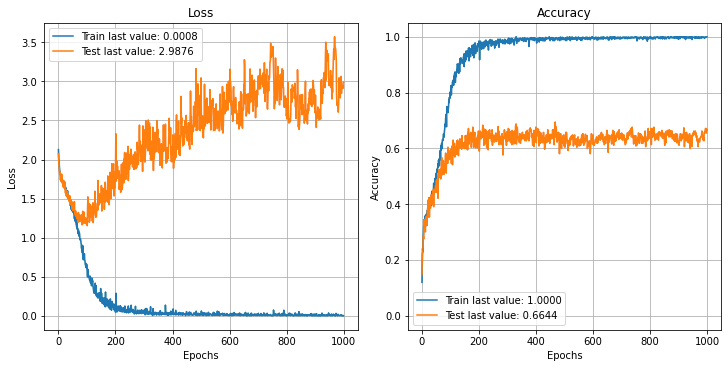

In [79]:
plot_history(history)
model.evaluate(test_X,test_y)